In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# use this: https://medium.com/@siladityaghosh/efficient-processing-of-large-csv-files-in-python-a-data-engineering-approach-3eabe3623416

In [ ]:
speed_data  = "/content/drive/MyDrive/masters-project/speed_data.csv"

In [ ]:
subsequences = "/content/drive/MyDrive/masters-project/subsequences.txt"
design = "/content/drive/MyDrive/masters-project/dr(eye)ve_design.txt"


In [ ]:
data = pd.read_csv(speed_data)

# Data Exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555000 entries, 0 to 554999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   file_number  555000 non-null  int64  
 1   frame_num    555000 non-null  int64  
 2   speed        555000 non-null  int64  
 3   course       551969 non-null  float64
 4   lat          555000 non-null  float64
 5   lon          555000 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 25.4 MB


In [ ]:
data

,file_number,frame_num,speed,course,lat,lon
0,1,1,34,348.0,0.0,0.0
1,1,2,35,347.0,0.0,0.0
2,1,3,35,347.0,0.0,0.0
3,1,4,35,346.0,0.0,0.0
4,1,5,35,346.0,0.0,0.0
...,...,...,...,...,...,...
554995,74,7496,0,302.0,0.0,0.0
554996,74,7497,0,302.0,0.0,0.0
554997,74,7498,0,302.0,0.0,0.0
554998,74,7499,0,302.0,0.0,0.0


In [ ]:
data.describe()

,file_number,frame_num,speed,course,lat,lon
count,555000.000000,555000.000000,5.550000e+05,551969.000000,555000.000000,555000.000000
mean,37.500000,3750.500000,1.319207e+07,182.771897,1.774777,0.434506
std,21.360029,2165.065441,4.079355e+08,109.124776,8.723721,2.135773
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,19.000000,1875.750000,2.900000e+01,97.000000,0.000000,0.000000
50%,37.500000,3750.500000,4.800000e+01,194.000000,0.000000,0.000000
75%,56.000000,5625.250000,6.900000e+01,294.000000,0.000000,0.000000
max,74.000000,7500.000000,1.111111e+11,2895.000000,44.906450,11.008330


In [ ]:
data.isnull().sum()

,0
file_number,0
frame_num,0
speed,0
course,3031
lat,0
lon,0


In [ ]:

data = data.iloc[1: , :]
data = data.reset_index(drop=True)


In [ ]:
data

,file_number,frame_num,speed,course,lat,lon
0,1,2,35,347.0,0.0,0.0
1,1,3,35,347.0,0.0,0.0
2,1,4,35,346.0,0.0,0.0
3,1,5,35,346.0,0.0,0.0
4,1,6,35,346.0,0.0,0.0
...,...,...,...,...,...,...
554994,74,7496,0,302.0,0.0,0.0
554995,74,7497,0,302.0,0.0,0.0
554996,74,7498,0,302.0,0.0,0.0
554997,74,7499,0,302.0,0.0,0.0


In [ ]:
FRAME_RATE = 30
FRAME_DURATION = 1/FRAME_RATE


In [ ]:
data['timestamp'] = data['frame_num'] * FRAME_DURATION


In [ ]:
data

,file_number,frame_num,speed,course,lat,lon,timestamp
0,1,2,35,347.0,0.0,0.0,0.066667
1,1,3,35,347.0,0.0,0.0,0.100000
2,1,4,35,346.0,0.0,0.0,0.133333
3,1,5,35,346.0,0.0,0.0,0.166667
4,1,6,35,346.0,0.0,0.0,0.200000
...,...,...,...,...,...,...,...
554994,74,7496,0,302.0,0.0,0.0,249.866667
554995,74,7497,0,302.0,0.0,0.0,249.900000
554996,74,7498,0,302.0,0.0,0.0,249.933333
554997,74,7499,0,302.0,0.0,0.0,249.966667


# event distribution type

In [ ]:
def analyze_group(df):
    result = df.groupby(df['event_type'].ne(df['event_type'].shift()).cumsum())['event_type'].value_counts()
    return result


In [ ]:
design_data = pd.read_csv(design, sep="\t")
design_data = design_data.T.reset_index().T.reset_index(drop=True)
design_data.columns = ['file_number', 'time', 'weather', 'location', 'D', 'train/test']
design_data.at[0,'file_number'] = '1'
design_data['file_number'] = design_data['file_number'].astype(int)
design_data

design_data

,file_number,time,weather,location,D,train/test
0,1,Evening,Sunny,Countryside,D8,Training Set
1,2,Morning,Cloudy,Highway,D2,Training Set
2,3,Evening,Sunny,Highway,D3,Training Set
3,4,Night,Sunny,Downtown,D2,Training Set
4,5,Morning,Cloudy,Countryside,D7,Training Set
...,...,...,...,...,...,...
69,70,Morning,Rainy,Downtown,D3,Test Set
70,71,Night,Cloudy,Highway,D6,Test Set
71,72,Evening,Cloudy,Downtown,D2,Test Set
72,73,Night,Sunny,Countryside,D7,Test Set


In [ ]:
speed_design_data = pd.merge(data, design_data, on='file_number')
speed_design_data


,file_number,frame_num,speed,course,lat,lon,timestamp,time,weather,location,D,train/test
0,1,2,35,347.0,0.0,0.0,0.066667,Evening,Sunny,Countryside,D8,Training Set
1,1,3,35,347.0,0.0,0.0,0.100000,Evening,Sunny,Countryside,D8,Training Set
2,1,4,35,346.0,0.0,0.0,0.133333,Evening,Sunny,Countryside,D8,Training Set
3,1,5,35,346.0,0.0,0.0,0.166667,Evening,Sunny,Countryside,D8,Training Set
4,1,6,35,346.0,0.0,0.0,0.200000,Evening,Sunny,Countryside,D8,Training Set
...,...,...,...,...,...,...,...,...,...,...,...,...
554994,74,7496,0,302.0,0.0,0.0,249.866667,Morning,Rainy,Downtown,D4,Test Set
554995,74,7497,0,302.0,0.0,0.0,249.900000,Morning,Rainy,Downtown,D4,Test Set
554996,74,7498,0,302.0,0.0,0.0,249.933333,Morning,Rainy,Downtown,D4,Test Set
554997,74,7499,0,302.0,0.0,0.0,249.966667,Morning,Rainy,Downtown,D4,Test Set


In [ ]:
speed_stats = speed_design_data.groupby('file_number')['speed'].agg(['mean', 'std', 'min', 'max'])
print(speed_stats)


                  mean        std  min  max
file_number                                
1            52.347113  18.507391    0   82
2            60.775600  13.504092    0   89
3            70.303733   6.361327   57   89
4            31.091867  18.971170    0   54
5            50.796400  21.163289    0   89
...                ...        ...  ...  ...
70           23.037467  15.130664    0   52
71           59.525200  20.709731    3   87
72           25.785333  15.354305    0   44
73           50.664667  19.464828    0   89
74           21.320267  17.392762    0   57

[74 rows x 4 columns]


In [ ]:
top_20_avg_speed = speed_stats.nlargest(20, 'mean')
least_20_avg_speed = speed_stats.nsmallest(20, 'mean')


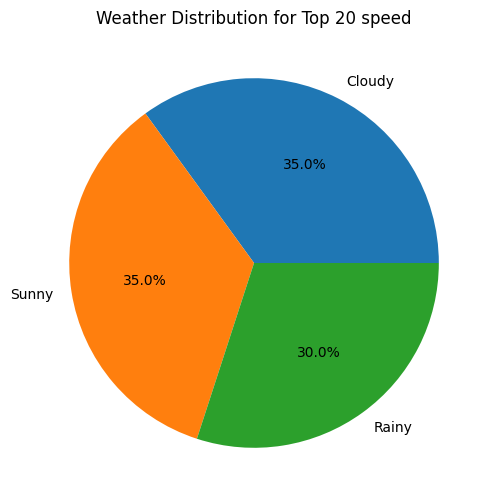

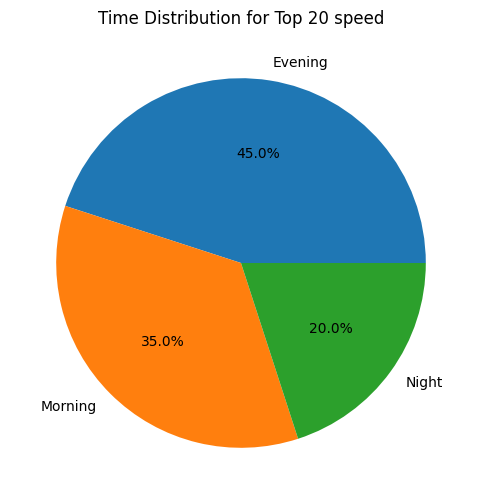

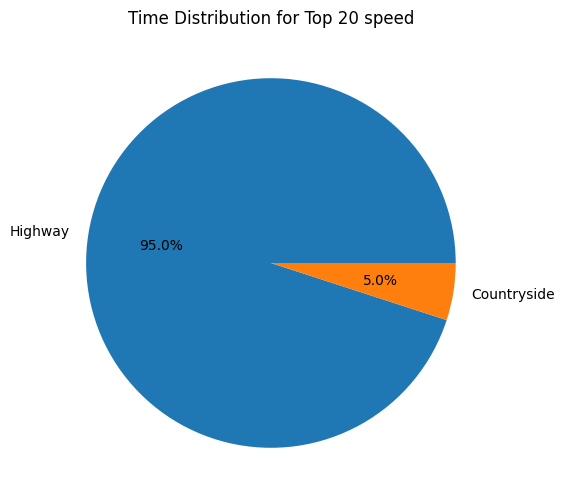

In [ ]:
top_20_speed_pd = pd.merge(top_20_avg_speed, design_data, on='file_number')
least_20_speed_pd = pd.merge(least_20_avg_speed, design_data, on='file_number')


plt.figure(figsize=(6, 6))
top_20_speed_pd['weather'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Weather Distribution for Top 20 speed')
plt.ylabel('')
plt.show()


plt.figure(figsize=(6, 6))
top_20_speed_pd['time'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Time Distribution for Top 20 speed')
plt.ylabel('')
plt.show()


plt.figure(figsize=(6, 6))
top_20_speed_pd['location'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Time Distribution for Top 20 speed')
plt.ylabel('')
plt.show()



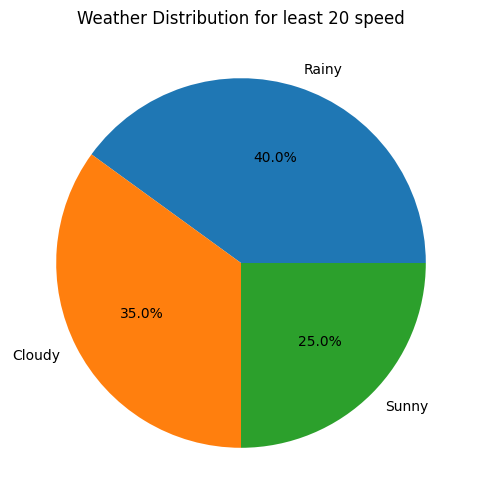

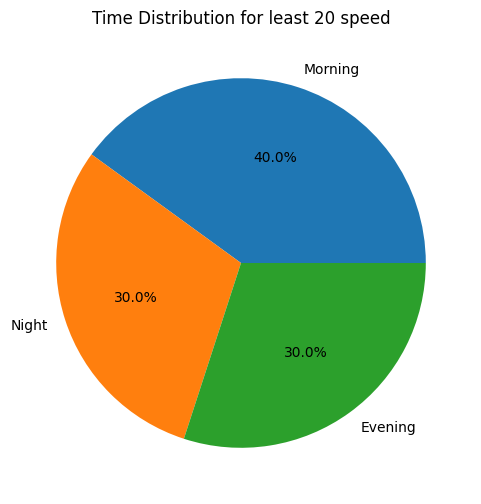

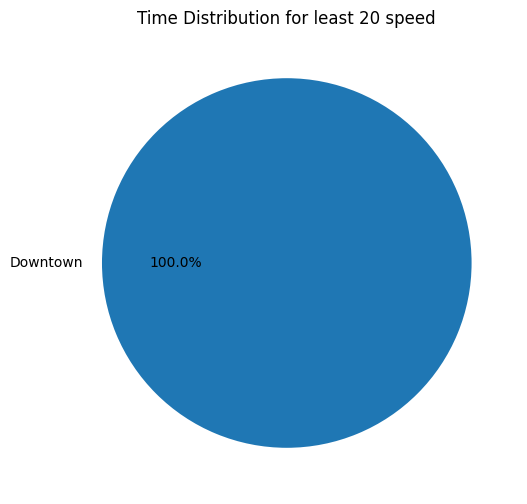

In [ ]:

plt.figure(figsize=(6, 6))
least_20_speed_pd['weather'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Weather Distribution for least 20 speed')
plt.ylabel('')
plt.show()


plt.figure(figsize=(6, 6))
least_20_speed_pd['time'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Time Distribution for least 20 speed')
plt.ylabel('')
plt.show()



plt.figure(figsize=(6, 6))
least_20_speed_pd['location'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Time Distribution for least 20 speed')
plt.ylabel('')
plt.show()


# Speed Analysis

In [ ]:
def event_counter(df):
    """
    Analyzes consecutive occurrences of events within a DataFrame.

    This function calculates two things for each event type in the DataFrame:
    1. The length of consecutive sequences of each event type.
    2. The number of times each event type appears consecutively in these sequences.

    Args:
        df (pd.DataFrame): DataFrame containing at least a column named 'event_type'.

    Returns:
        pd.Series: A Series with the count of consecutive occurrences of each event type.
    """
    result = df.groupby(df['speed'].ne(df['speed'].shift()).cumsum())['speed'].value_counts() # This line had an indentation error
    return result

event_counts = data.groupby('file_number').apply(event_counter) # Also, '-' was used instead of '_' in the function name
event_counts


file_number  speed  speed
1            1      35         7
             2      36        19
             3      37        35
             4      38        12
             5      39        11
                            ... 
74           600    4          5
             601    3          5
             602    2         10
             603    1         10
             604    0        287
Name: count, Length: 36196, dtype: int64

In [ ]:

avg_event_counts = event_counts.groupby(level=0).mean()
print(avg_event_counts)


file_number
1     16.517621
2     14.367816
3     32.751092
4     17.241379
5     11.885895
        ...    
70    11.609907
71    13.089005
72    16.268980
73    12.214984
74    12.417219
Name: count, Length: 74, dtype: float64


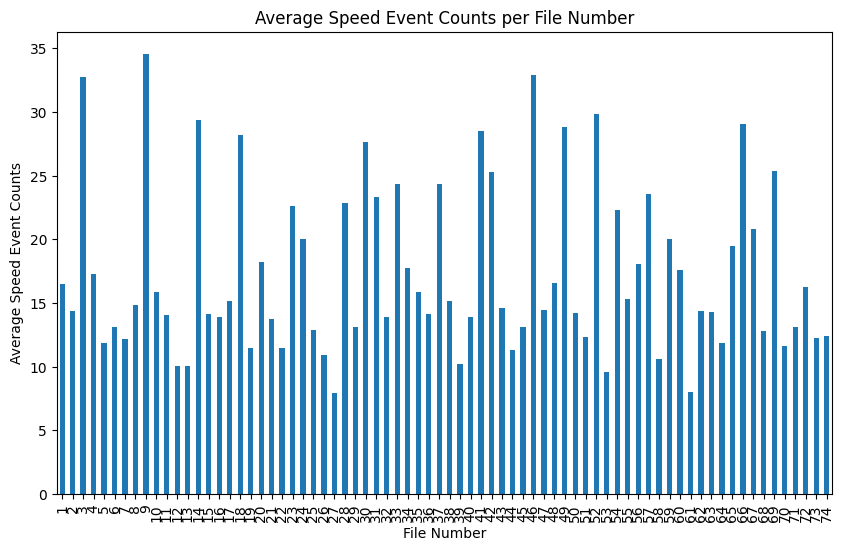

In [ ]:

# Plotting average event counts for each file number
plt.figure(figsize=(10, 6))
avg_event_counts.plot(kind='bar')
plt.title('Average Speed Event Counts per File Number')
plt.xlabel('File Number')
plt.ylabel('Average Speed Event Counts')
plt.show()


In [ ]:
overall_avg_event_counts = avg_event_counts.mean()
print(overall_avg_event_counts)


17.36315255774688


In [ ]:
merged_event_counts = pd.merge(avg_event_counts.reset_index(), design_data, left_on='file_number', right_on='file_number')
print(merged_event_counts)


    file_number      count     time weather     location   D    train/test
0             1  16.517621  Evening   Sunny  Countryside  D8  Training Set
1             2  14.367816  Morning  Cloudy      Highway  D2  Training Set
2             3  32.751092  Evening   Sunny      Highway  D3  Training Set
3             4  17.241379    Night   Sunny     Downtown  D2  Training Set
4             5  11.885895  Morning  Cloudy  Countryside  D7  Training Set
..          ...        ...      ...     ...          ...  ..           ...
69           70  11.609907  Morning   Rainy     Downtown  D3      Test Set
70           71  13.089005    Night  Cloudy      Highway  D6      Test Set
71           72  16.268980  Evening  Cloudy     Downtown  D2      Test Set
72           73  12.214984    Night   Sunny  Countryside  D7      Test Set
73           74  12.417219  Morning   Rainy     Downtown  D4      Test Set

[74 rows x 7 columns]


In [ ]:
least_20_event_counts = merged_event_counts.nsmallest(20, 'count')
print("Least 20 event counts:")
print(least_20_event_counts)

top_20_event_counts = merged_event_counts.nlargest(20, 'count')
print("\nTop 20 event counts:")
print(top_20_event_counts)


Least 20 event counts:
    file_number      count     time weather     location   D    train/test
26           27   7.961783  Evening   Rainy     Downtown  D6  Training Set
60           61   8.047210    Night   Sunny     Downtown  D5      Test Set
52           53   9.554140  Evening  Cloudy     Downtown  D7      Test Set
11           12  10.013351  Evening   Rainy     Downtown  D1  Training Set
12           13  10.026738    Night   Rainy     Downtown  D4  Training Set
38           39  10.245902    Night   Rainy     Downtown  D4      Test Set
57           58  10.593220    Night  Cloudy     Downtown  D4      Test Set
25           26  10.901163  Morning   Rainy     Downtown  D5  Training Set
43           44  11.329305  Morning   Rainy  Countryside  D1      Test Set
21           22  11.467890  Morning   Rainy  Countryside  D7  Training Set
18           19  11.503067    Night   Sunny     Downtown  D6  Training Set
69           70  11.609907  Morning   Rainy     Downtown  D3      Test Set
4 

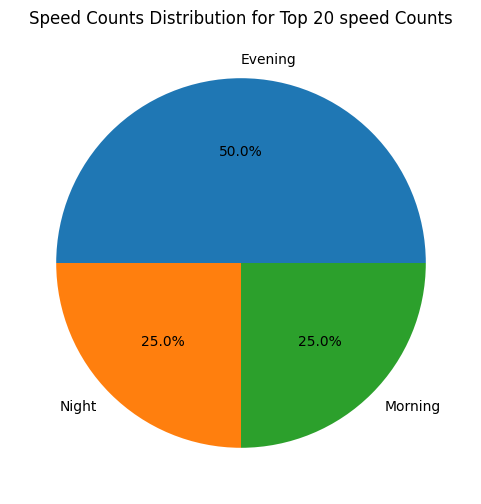

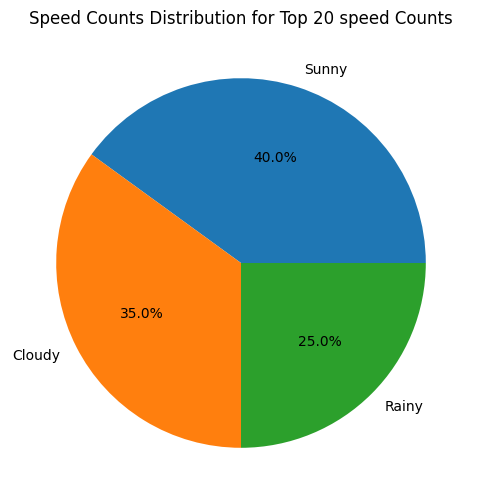

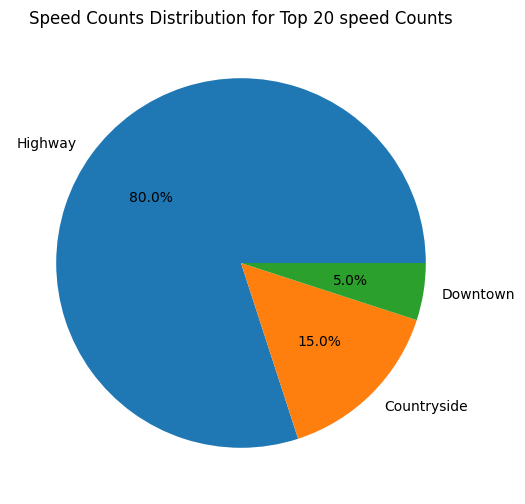

In [ ]:

# Top 20 event counts
plt.figure(figsize=(6, 6))
top_20_event_counts['time'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Speed Counts Distribution for Top 20 speed Counts')
plt.ylabel('')
plt.show()

plt.figure(figsize=(6, 6))
top_20_event_counts['weather'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Speed Counts Distribution for Top 20 speed Counts')
plt.ylabel('')
plt.show()

plt.figure(figsize=(6, 6))
top_20_event_counts['location'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Speed Counts Distribution for Top 20 speed Counts')
plt.ylabel('')
plt.show()


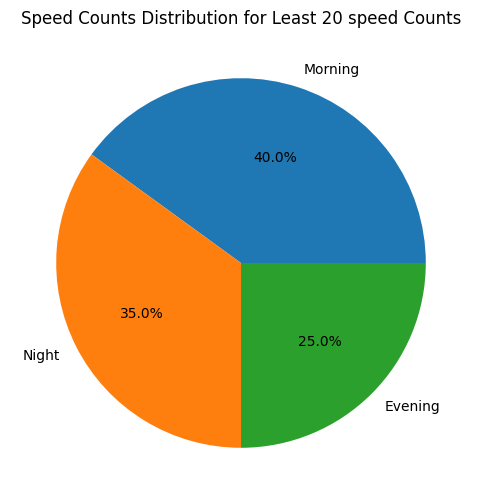

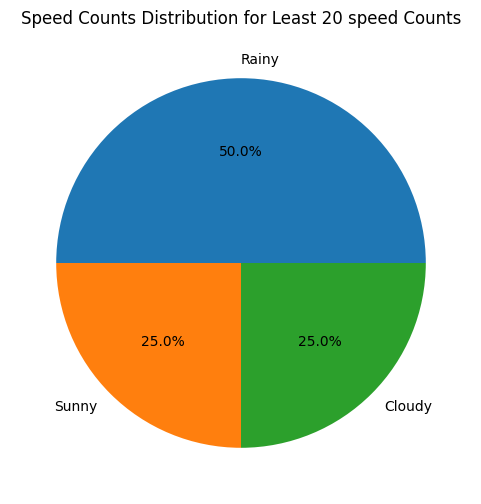

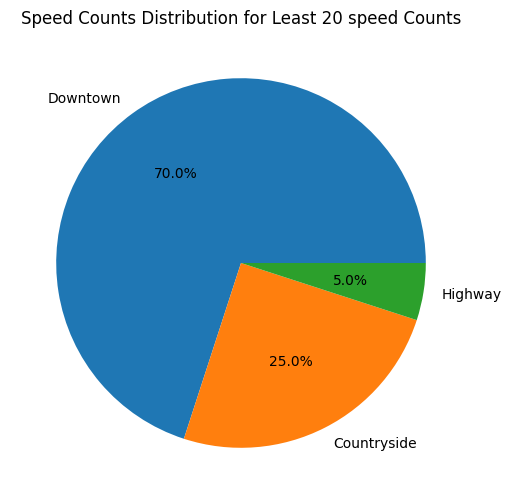

In [ ]:
plt.figure(figsize=(6, 6))
least_20_event_counts['time'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Speed Counts Distribution for Least 20 speed Counts')
plt.ylabel('')
plt.show()

plt.figure(figsize=(6, 6))
least_20_event_counts['weather'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Speed Counts Distribution for Least 20 speed Counts')
plt.ylabel('')
plt.show()

plt.figure(figsize=(6, 6))
least_20_event_counts['location'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Speed Counts Distribution for Least 20 speed Counts')
plt.ylabel('')
plt.show()
